In [1]:
import re
import pandas as pd

In [2]:
f = open('_chat 3.txt','r',encoding='utf-8')

In [3]:
data=f.read()

In [4]:
print(data)

[10/05/21, 3:23:14 PM] Raj Sakec: sid ke alava sb suno
[10/05/21, 3:23:22 PM] Rachit: Boloo
[10/05/21, 3:23:22 PM] Raj Sakec: apne ko vo dbms k pracs krne hai na
[10/05/21, 3:23:31 PM] Raj Sakec: toh time batao sb log
[10/05/21, 3:23:35 PM] Aryan Sakec: ooooohhhhh
[10/05/21, 3:23:37 PM] Rachit: Ruko abhi Mimi project chal raha hai
[10/05/21, 3:23:39 PM] Raj Sakec: aaj krna hai toh khtm krte h
[10/05/21, 3:23:45 PM] Raj Sakec: mostly one hr me ho jyega
[10/05/21, 3:23:49 PM] Rachit: Kal phython ka sumbission
[10/05/21, 3:23:53 PM] Aryan Sakec: Mera review chal raha hai
[10/05/21, 3:23:55 PM] Rachit: Puch sod ko
[10/05/21, 3:23:57 PM] Rachit: Same
[10/05/21, 3:23:59 PM] Sid: Humko ek expt mei 2 ghanta gaya hai🥲😂
[10/05/21, 3:23:59 PM] Raj Sakec: tune hi bataya na gandu
[10/05/21, 3:24:00 PM] Aryan Sakec: Decide karlo
[10/05/21, 3:24:48 PM] Raj Sakec: 😂i feel bad for you
[10/05/21, 3:24:50 PM] Raj Sakec: Aj agr sb busy hai toh kal krte hai
[10/05/21, 3:24:50 PM] Vishal Sakec: Kal karte ha

In [5]:
import re

# Regex pattern to extract time and messages
pattern = r"\[([^]]+)\] (.+?(?=\n|\Z))"

matches = re.findall(pattern, data)

# Convert the matches into a list of lists
messages_list = [list(match) for match in matches]

messages_list


[['10/05/21, 3:23:14\u202fPM', 'Raj Sakec: sid ke alava sb suno'],
 ['10/05/21, 3:23:22\u202fPM', 'Rachit: Boloo'],
 ['10/05/21, 3:23:22\u202fPM',
  'Raj Sakec: apne ko vo dbms k pracs krne hai na'],
 ['10/05/21, 3:23:31\u202fPM', 'Raj Sakec: toh time batao sb log'],
 ['10/05/21, 3:23:35\u202fPM', 'Aryan Sakec: ooooohhhhh'],
 ['10/05/21, 3:23:37\u202fPM', 'Rachit: Ruko abhi Mimi project chal raha hai'],
 ['10/05/21, 3:23:39\u202fPM', 'Raj Sakec: aaj krna hai toh khtm krte h'],
 ['10/05/21, 3:23:45\u202fPM', 'Raj Sakec: mostly one hr me ho jyega'],
 ['10/05/21, 3:23:49\u202fPM', 'Rachit: Kal phython ka sumbission'],
 ['10/05/21, 3:23:53\u202fPM', 'Aryan Sakec: Mera review chal raha hai'],
 ['10/05/21, 3:23:55\u202fPM', 'Rachit: Puch sod ko'],
 ['10/05/21, 3:23:57\u202fPM', 'Rachit: Same'],
 ['10/05/21, 3:23:59\u202fPM', 'Sid: Humko ek expt mei 2 ghanta gaya hai🥲😂'],
 ['10/05/21, 3:23:59\u202fPM', 'Raj Sakec: tune hi bataya na gandu'],
 ['10/05/21, 3:24:00\u202fPM', 'Aryan Sakec: Decide 

In [6]:
import pandas as pd
df = pd.DataFrame(messages_list,columns=["date","user_message"])
df.head()

,date,user_message
0,"10/05/21, 3:23:14 PM",Raj Sakec: sid ke alava sb suno
1,"10/05/21, 3:23:22 PM",Rachit: Boloo
2,"10/05/21, 3:23:22 PM",Raj Sakec: apne ko vo dbms k pracs krne hai na
3,"10/05/21, 3:23:31 PM",Raj Sakec: toh time batao sb log
4,"10/05/21, 3:23:35 PM",Aryan Sakec: ooooohhhhh


In [7]:
df.shape

(43264, 2)

In [8]:
df = df[df['date'].str.contains('AM|PM', case=False)]
df.shape

(43258, 2)

In [9]:
#Converting dataframe to datetime datatype
df["date"] = pd.to_datetime(df["date"],format='%d/%m/%y, %I:%M:%S %p',errors="coerce")
df.shape

(43258, 2)

In [10]:
df.dropna(inplace=True)

In [11]:
df.head()

,date,user_message
0,2021-05-10 15:23:14,Raj Sakec: sid ke alava sb suno
1,2021-05-10 15:23:22,Rachit: Boloo
2,2021-05-10 15:23:22,Raj Sakec: apne ko vo dbms k pracs krne hai na
3,2021-05-10 15:23:31,Raj Sakec: toh time batao sb log
4,2021-05-10 15:23:35,Aryan Sakec: ooooohhhhh


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43253 entries, 0 to 43263
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          43253 non-null  datetime64[ns]
 1   user_message  43253 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1013.7+ KB


In [13]:
data = 'Taniaa: Taniaa created group “Sangeeet Diti”'
x = re.split('([\w\W]+?):\s',data)
x[1:]

['Taniaa', 'Taniaa created group “Sangeeet Diti”']

In [14]:
# Seperate users and messages
users = []
messages = []

for message in df["user_message"]:
    info = re.split('([\w\W]+?):\s',message)
    try:
        if info[1:]:
            users.append(info[1])
            messages.append(info[2])
        else:
            users.append('group_notification')
            messages.append(info[0])
    except Exception as e:
        raise("Error Occured")
        
df['user'] = users
df['messages'] = messages
df.drop(columns=['user_message'],inplace=True)

df.head(7)

,date,user,messages
0,2021-05-10 15:23:14,Raj Sakec,sid ke alava sb suno
1,2021-05-10 15:23:22,Rachit,Boloo
2,2021-05-10 15:23:22,Raj Sakec,apne ko vo dbms k pracs krne hai na
3,2021-05-10 15:23:31,Raj Sakec,toh time batao sb log
4,2021-05-10 15:23:35,Aryan Sakec,ooooohhhhh
5,2021-05-10 15:23:37,Rachit,Ruko abhi Mimi project chal raha hai
6,2021-05-10 15:23:39,Raj Sakec,aaj krna hai toh khtm krte h


In [15]:
# Extracting the individul components of the date
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year
df['hour'] = df['date'].dt.hour
df['min'] = df['date'].dt.minute
df['sec'] = df['date'].dt.second
df.head()

,date,user,messages,day,month,year,hour,min,sec
0,2021-05-10 15:23:14,Raj Sakec,sid ke alava sb suno,10,May,2021,15,23,14
1,2021-05-10 15:23:22,Rachit,Boloo,10,May,2021,15,23,22
2,2021-05-10 15:23:22,Raj Sakec,apne ko vo dbms k pracs krne hai na,10,May,2021,15,23,22
3,2021-05-10 15:23:31,Raj Sakec,toh time batao sb log,10,May,2021,15,23,31
4,2021-05-10 15:23:35,Aryan Sakec,ooooohhhhh,10,May,2021,15,23,35


In [16]:
df['user'].unique()

array(['Raj Sakec', 'Rachit', 'Aryan Sakec', 'Sid', 'Vishal Sakec',
       'Dhruv Totre Sakec', 'Yahya Sakerwala Sakec', '\u200eYou'],
      dtype=object)

In [17]:
#printing the total shape
print(df[df['user']=="Rachit"].shape)
#printing the number of rows alone
print(df[df['user']=="Rachit"].shape[0])

(4954, 9)
4954


In [18]:
words = []
for message in df['messages']:
    words.extend(message.split())


In [19]:
df["messages"].value_counts()

messages
‎sticker omitted                                           721
Haa                                                        701
😂😂                                                         623
‎image omitted                                             557
Ok                                                         542
                                                          ... 
Tu mc toh muh band hi rakh                                   1
Cricket?                                                     1
Pratishta ka story dekha                                     1
Itna khaas nai laga merko woh                                1
Bol ki in dono ke cycle ka company aur colour same hai😂      1
Name: count, Length: 32458, dtype: int64

In [20]:
df[df["messages"] == "‎image omitted"].shape[0]

557

In [21]:
df[df["messages"] == "\u200eThis message was deleted."].shape[0]

359

In [22]:
df['messages'].str.contains('image omitted', case=False).sum()

557

In [23]:
!pip install urlextract

In [24]:
from urlextract import URLExtract

extractor = URLExtract()
links = []

for message in df["messages"]:
    links.extend(extractor.find_urls(message))
    
links

['https://forms.gle/xeMjfTB4fme3izgi7',
 'https://forms.gle/scGRBGDq2sY3fBWR8',
 'https://www.geeksforgeeks.org/difference-between-macro-and-procedure/#:~:text=Macro%20definition%20contains%20a%20set,can%20perform%20a%20specific%20task.&text=CALL%20and%20RET%20instruction%2Fstatements,statements%20are%20required%20in%20procedure',
 'https://t.me/joinchat/Bys7aENuteY0YWE9',
 'https://forms.gle/N47DtrQq8Keu7Sv39',
 'https://bit.ly/Apti_2_14July',
 'https://forms.office.com/Pages/ResponsePage.aspx?id=DblFISqvy0O5O_qDbJtLhOcTSiyrsZZAvS_yq66xcG1UQjFBUENDVFlNQ040NDk4WVJZOVVCOEo2SS4u',
 'https://www.virtualbox.org/wiki/Downloads',
 'https://www.osboxes.org/ubuntu/',
 'https://teams.microsoft.com/l/meetup-join/19:F_zNG1___RFjilSxDJqKMhbNXlj5ujEa3GWir35VfpI1@thread.tacv2/1628666402087?context=%7B%22Tid%22:%222145b90d-af2a-43cb-b93b-fa836c9b4b84%22,%22Oid%22:%22cf093c98-cd0e-4fb3-8faf-ebf0e42d0dd4%22%7D',
 'https://www.virtualbox.org/wiki/Downloads',
 'https://www.osboxes.org/ubuntu/',
 'https:/

In [25]:
message_counts = df["user"].value_counts().head(7)
message_counts

user
Sid                      12035
Vishal Sakec             10635
Raj Sakec                 5135
Rachit                    4954
Dhruv Totre Sakec         4423
Aryan Sakec               3750
Yahya Sakerwala Sakec     2319
Name: count, dtype: int64

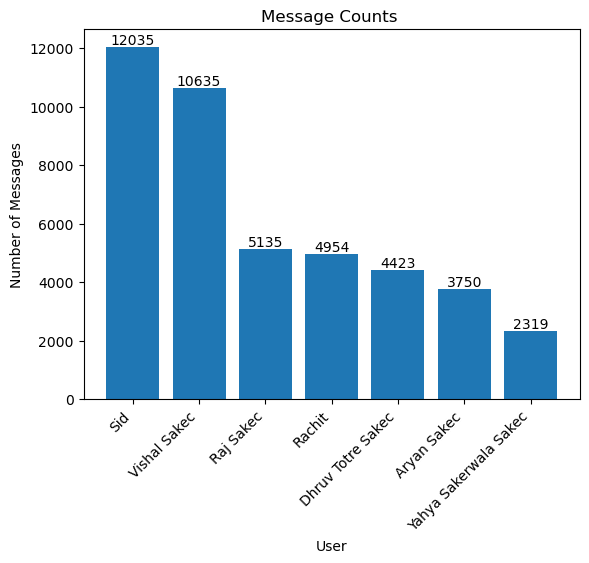

In [26]:
import matplotlib.pyplot as plt


# Plot a bar graph
plt.bar(message_counts.index, message_counts.values)
plt.xlabel('User')
plt.ylabel('Number of Messages')
plt.title("Message Counts ")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# Add count annotations on top of each bar
for i, count in enumerate(message_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()

In [27]:
new_df1 = round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'count':'percent'})
new_df1

,user,percent
0,Sid,27.82
1,Vishal Sakec,24.59
2,Raj Sakec,11.87
3,Rachit,11.45
4,Dhruv Totre Sakec,10.23
5,Aryan Sakec,8.67
6,Yahya Sakerwala Sakec,5.36
7,‎You,0.00


In [28]:
new_df2 = df["user"].value_counts().reset_index()
new_df2

,user,count
0,Sid,12035
1,Vishal Sakec,10635
2,Raj Sakec,5135
3,Rachit,4954
4,Dhruv Totre Sakec,4423
5,Aryan Sakec,3750
6,Yahya Sakerwala Sakec,2319
7,‎You,2


In [29]:
merged_df = pd.merge(new_df1, new_df2, on='user')
merged_df

,user,percent,count
0,Sid,27.82,12035
1,Vishal Sakec,24.59,10635
2,Raj Sakec,11.87,5135
3,Rachit,11.45,4954
4,Dhruv Totre Sakec,10.23,4423
5,Aryan Sakec,8.67,3750
6,Yahya Sakerwala Sakec,5.36,2319
7,‎You,0.00,2


In [30]:
words = []

for message in df["messages"]:
    words.extend(message.split())

In [31]:
import nltk
from nltk.corpus import stopwords

In [32]:
# remove all sticker/video/image/This "message was deleted. 
ignore_text = ["\u200eimage omitted", "\u200eThis message was deleted." , "\u200evideo omitted" , "\u200esticker omitted"  ]
df_filtered = df[~df['messages'].isin(ignore_text)]
df_filtered

,date,user,messages,day,month,year,hour,min,sec
0,2021-05-10 15:23:14,Raj Sakec,sid ke alava sb suno,10,May,2021,15,23,14
1,2021-05-10 15:23:22,Rachit,Boloo,10,May,2021,15,23,22
2,2021-05-10 15:23:22,Raj Sakec,apne ko vo dbms k pracs krne hai na,10,May,2021,15,23,22
3,2021-05-10 15:23:31,Raj Sakec,toh time batao sb log,10,May,2021,15,23,31
4,2021-05-10 15:23:35,Aryan Sakec,ooooohhhhh,10,May,2021,15,23,35
...,...,...,...,...,...,...,...,...,...
43259,2024-01-04 16:17:37,Sid,Batch ke ladko ko dikhaa raha tha... Uska photo 😂,4,January,2024,16,17,37
43260,2024-01-04 16:17:42,Aryan Sakec,Yeh dooriyan....,4,January,2024,16,17,42
43261,2024-01-04 16:18:04,Aryan Sakec,😂😂,4,January,2024,16,18,4
43262,2024-01-04 16:18:49,Aryan Sakec,Bol ki in dono ke cycle ka company aur colour ...,4,January,2024,16,18,49


In [33]:
#Remove Stopwords
f = open('stopwords.txt','r')
stop_words = f.read()

words = []

for message in df_filtered["messages"]:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [34]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(50))

,0,1
0,toh,2412
1,nai,1973
2,nahi,1635
3,aur,1259
4,mein,1247
5,😂,1109
6,raha,1005
7,mei,950
8,kuch,890
9,kiya,762


In [35]:
df.head()

,date,user,messages,day,month,year,hour,min,sec
0,2021-05-10 15:23:14,Raj Sakec,sid ke alava sb suno,10,May,2021,15,23,14
1,2021-05-10 15:23:22,Rachit,Boloo,10,May,2021,15,23,22
2,2021-05-10 15:23:22,Raj Sakec,apne ko vo dbms k pracs krne hai na,10,May,2021,15,23,22
3,2021-05-10 15:23:31,Raj Sakec,toh time batao sb log,10,May,2021,15,23,31
4,2021-05-10 15:23:35,Aryan Sakec,ooooohhhhh,10,May,2021,15,23,35


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43253 entries, 0 to 43263
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      43253 non-null  datetime64[ns]
 1   user      43253 non-null  object        
 2   messages  43253 non-null  object        
 3   day       43253 non-null  int32         
 4   month     43253 non-null  object        
 5   year      43253 non-null  int32         
 6   hour      43253 non-null  int32         
 7   min       43253 non-null  int32         
 8   sec       43253 non-null  int32         
dtypes: datetime64[ns](1), int32(5), object(3)
memory usage: 2.5+ MB


In [37]:
df.head()

,date,user,messages,day,month,year,hour,min,sec
0,2021-05-10 15:23:14,Raj Sakec,sid ke alava sb suno,10,May,2021,15,23,14
1,2021-05-10 15:23:22,Rachit,Boloo,10,May,2021,15,23,22
2,2021-05-10 15:23:22,Raj Sakec,apne ko vo dbms k pracs krne hai na,10,May,2021,15,23,22
3,2021-05-10 15:23:31,Raj Sakec,toh time batao sb log,10,May,2021,15,23,31
4,2021-05-10 15:23:35,Aryan Sakec,ooooohhhhh,10,May,2021,15,23,35


In [38]:
timeline = df.groupby(['year','month']).count()['messages'].reset_index()

In [39]:
timeline 

,year,month,messages
0,2021,August,2101
1,2021,December,471
2,2021,July,390
3,2021,June,899
4,2021,May,1061
5,2021,November,1520
6,2021,October,3770
7,2021,September,1161
8,2022,April,4269
9,2022,August,2996


In [40]:
time = []

for i in range(timeline.shape[0]):
    time.append(timeline["month"][i] + "-" + str(timeline["year"][i]))

In [41]:
timeline["time"] = time
timeline

,year,month,messages,time
0,2021,August,2101,August-2021
1,2021,December,471,December-2021
2,2021,July,390,July-2021
3,2021,June,899,June-2021
4,2021,May,1061,May-2021
5,2021,November,1520,November-2021
6,2021,October,3770,October-2021
7,2021,September,1161,September-2021
8,2022,April,4269,April-2022
9,2022,August,2996,August-2022


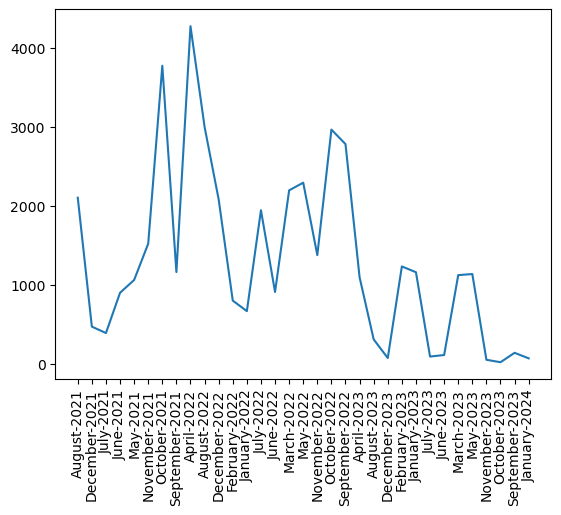

In [42]:
plt.plot(timeline["time"],timeline["messages"])
plt.xticks(rotation="vertical")
plt.show()

In [43]:
df["datee"] = df["date"].dt.date

In [44]:
daily_timeline = df.groupby("datee").count()["messages"].reset_index()

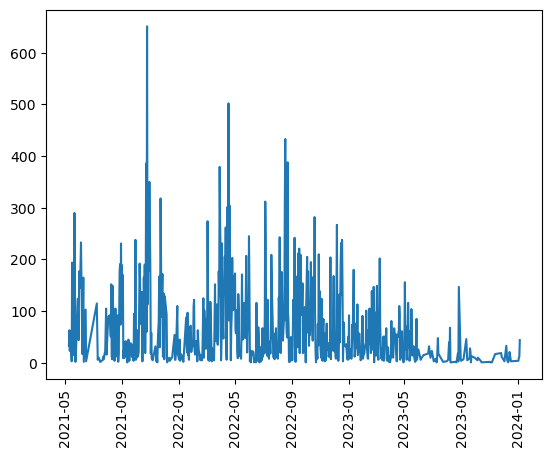

In [45]:
plt.plot(daily_timeline["datee"],daily_timeline["messages"])
plt.xticks(rotation="vertical")
plt.show()

In [46]:
df["day_name"] = df["date"].dt.day_name()
day_timeline = df["day_name"].value_counts().reset_index()
day_timeline

,day_name,count
0,Thursday,7564
1,Monday,7535
2,Wednesday,7278
3,Tuesday,6579
4,Friday,5806
5,Saturday,5379
6,Sunday,3112


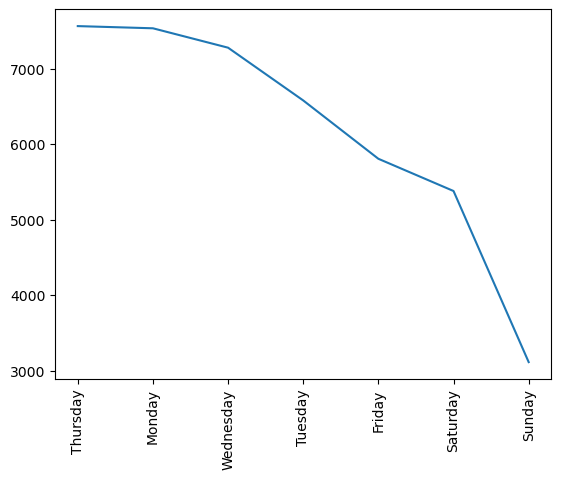

In [47]:
plt.plot(day_timeline["day_name"],day_timeline["count"])
plt.xticks(rotation="vertical")
plt.show()

In [48]:
df.head()

,date,user,messages,day,month,year,hour,min,sec,datee,day_name
0,2021-05-10 15:23:14,Raj Sakec,sid ke alava sb suno,10,May,2021,15,23,14,2021-05-10,Monday
1,2021-05-10 15:23:22,Rachit,Boloo,10,May,2021,15,23,22,2021-05-10,Monday
2,2021-05-10 15:23:22,Raj Sakec,apne ko vo dbms k pracs krne hai na,10,May,2021,15,23,22,2021-05-10,Monday
3,2021-05-10 15:23:31,Raj Sakec,toh time batao sb log,10,May,2021,15,23,31,2021-05-10,Monday
4,2021-05-10 15:23:35,Aryan Sakec,ooooohhhhh,10,May,2021,15,23,35,2021-05-10,Monday


In [49]:
df["hour"].unique()

array([15, 22, 23, 12, 18, 19,  9, 10, 11, 16, 17, 14, 13,  8, 20, 21,  7,
        0,  1,  2,  5,  6,  3,  4], dtype=int32)

In [50]:
period = []

for hour in df[['day_name','hour']]['hour']:
    
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))    
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))  
    else:
        period.append(str(hour) + "-" + str(hour+1))
    
df["period"] = period
df.head()

,date,user,messages,day,month,year,hour,min,sec,datee,day_name,period
0,2021-05-10 15:23:14,Raj Sakec,sid ke alava sb suno,10,May,2021,15,23,14,2021-05-10,Monday,15-16
1,2021-05-10 15:23:22,Rachit,Boloo,10,May,2021,15,23,22,2021-05-10,Monday,15-16
2,2021-05-10 15:23:22,Raj Sakec,apne ko vo dbms k pracs krne hai na,10,May,2021,15,23,22,2021-05-10,Monday,15-16
3,2021-05-10 15:23:31,Raj Sakec,toh time batao sb log,10,May,2021,15,23,31,2021-05-10,Monday,15-16
4,2021-05-10 15:23:35,Aryan Sakec,ooooohhhhh,10,May,2021,15,23,35,2021-05-10,Monday,15-16


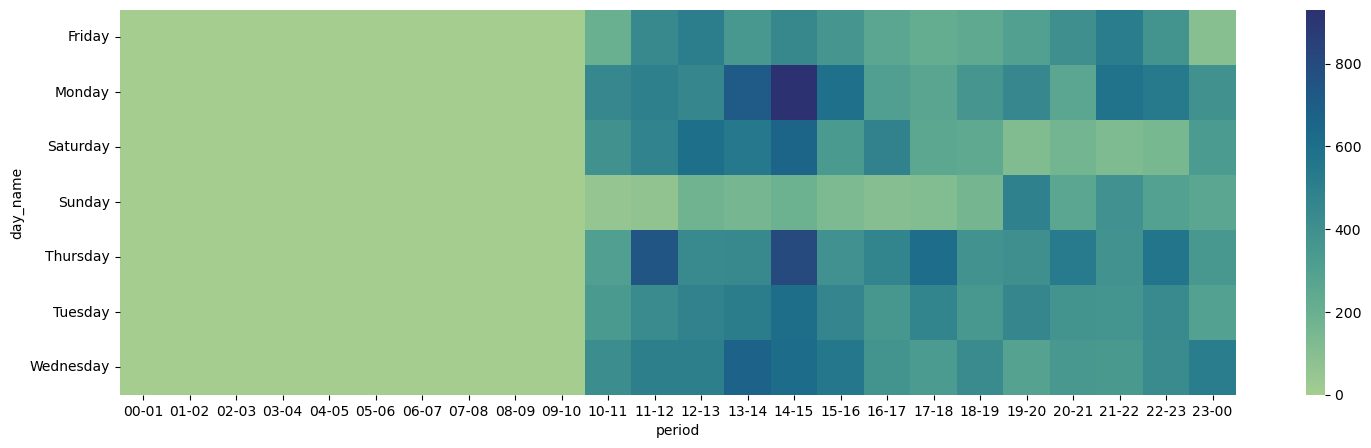

In [51]:
import seaborn as sns
plt.figure(figsize=(18,5))
df['period'] = pd.Categorical(df['period'], categories=[f"{i:02d}-{(i + 1) % 24:02d}" for i in range(24)], ordered=True)
sns.heatmap(df.pivot_table(index="day_name",columns="period",values = "messages",aggfunc='count').fillna(0),cmap="crest")
plt.yticks(rotation="horizontal")
plt.show()